# Project Domain:Tv_Flipkart
# Project Title: Electronics

# Load the required libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for webscraping
import requests
from bs4 import BeautifulSoup
import time
import re
import warnings 
warnings.filterwarnings("ignore")

# Identify the URL

In [2]:
url='https://www.flipkart.com/search?q=tv+smart+tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page=1'

# Request the html code from specified url

In [3]:
page=requests.get(url)

# Response the requested status code

In [4]:
page.status_code

200

In [5]:
# Display the whole code of the website

In [6]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

# WebScraping

In [7]:
# creating Empty Lists :
productname = [] 
originalprice  = []
rating = []
features = [] 
disc = []
discprice = []
pagenum = []

#Extracting the data  from 1 to 25 pages:-
for i in range(1,25):
    start_time = time.time()
    url=(f'https://www.flipkart.com/search?q=tv+smart+tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page={i}')
    #req = requests.get(URL[url])
    time.sleep(3)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
#Extracting the data through class id's:
    
    for x in soup.find_all('div', attrs = {'class':'_3pLy-c row'}):
        pname = x.find('div', attrs = {'class':'_4rR01T' })
        price  = x.find('div', attrs = {'class':'_3I9_wc _27UcVY'})
        rat   = x.find('div', attrs = {'class':'_3LWZlK'})
        fea = x.find('div', attrs = {'class': 'fMghEO'})
        dp =x.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        
        if pname is None:
            productname.append(np.NaN)
        else:
            productname.append(pname.text)
            
        if price is None:
            originalprice.append(np.NaN)
        else:
            originalprice.append(price.text)
            
        if rat is None:
            rating.append(np.NaN)
        else:
            rating.append(rat.text)
            
        if fea is None:
            features.append(np.NaN)
        else:
            features.append(fea.text)
            
        if dp is None:
            discprice.append(np.NaN)
        else:
            discprice.append(dp.text)
            
           
        pagenum.append(i)
#print('page{} completed in {} seconds',format(i,time.time()-start_time))

In [8]:
len(productname)

576

In [9]:
#list of data extracted from the webpages

In [10]:
productname

['Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)',
 'SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tizen TV with 2022 Model',
 'Vu 108 cm (43 inch) Ultra HD (4K) LED Smart WebOS TV',
 'Infinix Y1 80 cm (32 inch) HD Ready LED Smart Linux TV with Wall Mount',
 'Thomson Alpha 80 cm (32 inch) HD Ready LED Smart Linux TV with 30 W Sound Output & Bezel-Less Design',
 'LG 80 cm (32 inch) HD Ready LED Smart WebOS TV',
 'realme 126 cm (50 inch) Ultra HD (4K) LED Smart Android TV with Handsfree Voice Search and Dolby Visio...',
 'OnePlus Y1S 108 cm (43 inch) Full HD LED Smart Android TV with Android 11 and Bezel-Less Frame',
 'OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart Android TV with Android 11 and Bezel-Less Frame',
 'LG UQ7500 108 cm (43 inch) Ultra HD (4K) LED Smart WebOS TV 2022 Edition',
 'OnePlus Y1 100 cm (40 inch) Full HD LED Smart Android TV with Dolby Audio',
 'SAMSUNG Crystal 4K Neo Series 108 cm (43 inch) Ultra HD (4K) LED Smart Tizen TV with (Bla

# Create a dataframe

In [11]:
tv=pd.DataFrame({'Product_Name':productname,'Original_Price':originalprice,'Rating':rating,'Features':features,'Discount_Price':discprice,})

In [12]:
tv.head(20)

,Product_Name,Original_Price,Rating,Features,Discount_Price
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999"
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490"
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999"
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999"
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999"
5,LG 80 cm (32 inch) HD Ready LED Smart WebOS TV,"₹21,990",4.4,Operating System: WebOSHD Ready 1366 x 768 Pix...,"₹13,490"
6,realme 126 cm (50 inch) Ultra HD (4K) LED Smar...,"₹42,999",4.3,Operating System: AndroidUltra HD (4K) 3840 x ...,"₹28,999"
7,OnePlus Y1S 108 cm (43 inch) Full HD LED Smart...,"₹31,999",4.3,Operating System: AndroidFull HD 1920 x 1080 P...,"₹24,999"
8,OnePlus Y1S 80 cm (32 inch) HD Ready LED Smart...,"₹21,999",4.3,Operating System: AndroidHD Ready 1366 x 768 P...,"₹15,999"
9,LG UQ7500 108 cm (43 inch) Ultra HD (4K) LED S...,"₹49,990",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹30,990"


In [13]:
tv.describe(include='all')

,Product_Name,Original_Price,Rating,Features,Discount_Price
count,576,543,437,576,576
unique,409,255,19,209,289
top,Dyanora Sigma 108 cm (43 inch) Full HD LED Sma...,"₹29,999",4.3,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹16,999"
freq,12,22,109,34,12


# convert dataframe into .csv file

In [14]:
df=tv.to_csv('tv.csv')

In [15]:
df

In [16]:
# creating brand column and extracting data from another column using regex

In [17]:
tv['Brand']=tv['Product_Name'].apply(lambda x: re.findall('^\w+',x))

In [18]:
tv.head()

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",[Mi]
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",[SAMSUNG]
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",[Vu]
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Infinix]
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Thomson]


In [19]:
tv['OperatingSystem']=tv['Features'].apply(lambda x: re.findall('[\w\s]+HD',x))

In [20]:
tv.head()

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",[Mi],[ AndroidHD]
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",[SAMSUNG],[ TizenHD]
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",[Vu],[ WebOSUltra HD]
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Infinix],[ LinuxHD]
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Thomson],[ LinuxHD]


In [21]:
tv['Screen_Size']=tv['Product_Name'].apply(lambda x: re.findall('[0-9].[\w\s]+inch|Inch',x))

In [22]:
tv

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",[Mi],[ AndroidHD],[32 inch]
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",[SAMSUNG],[ TizenHD],[Inch]
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",[Vu],[ WebOSUltra HD],[43 inch]
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Infinix],[ LinuxHD],[32 inch]
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Thomson],[ LinuxHD],[32 inch]
...,...,...,...,...,...,...,...,...
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,"₹46,999",4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,"₹28,999",[KODAK],[ AndroidUltra HD],[55 inch]
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,"₹1,49,900",4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,"₹89,999",[SAMSUNG],[ TizenUltra HD],[65 inch]
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,"₹2,39,900",NaN,Operating System: Google TVUltra HD (4K) 3840 ...,"₹1,44,990",[SONY],[ Google TVUltra HD],[65 inch]
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹64,990",NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,"₹38,000",[Haier],[Ultra HD],[50 inch]


In [23]:
tv['Warranty']=tv['Features'].apply(lambda x:re.findall('[0-9][\s]+Year',x))

In [24]:
tv.tail()

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,"₹46,999",4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,"₹28,999",[KODAK],[ AndroidUltra HD],[55 inch],[1 Year]
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,"₹1,49,900",4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,"₹89,999",[SAMSUNG],[ TizenUltra HD],[65 inch],"[1 Year, 1 Year]"
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,"₹2,39,900",NaN,Operating System: Google TVUltra HD (4K) 3840 ...,"₹1,44,990",[SONY],[ Google TVUltra HD],[65 inch],[]
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹64,990",NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,"₹38,000",[Haier],[Ultra HD],[50 inch],[]
575,LG 164 cm (65 inch) OLED Ultra HD (4K) Smart W...,"₹3,19,990",NaN,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹2,04,990",[LG],[ WebOSUltra HD],[65 inch],"[1 Year, 1 Year]"


In [25]:
tv['Pixels']=tv['Features'].apply(lambda x: re.findall('[0-9].[\w\s]+Pixels',x))

In [26]:
tv

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",[Mi],[ AndroidHD],[32 inch],"[1 Year, 2 Year]",[1366 x 768 Pixels]
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",[SAMSUNG],[ TizenHD],[Inch],"[1 Year, 1 Year]",[1366 x 768 Pixels]
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",[Vu],[ WebOSUltra HD],[43 inch],[1 Year],[3840 x 2160 Pixels]
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Infinix],[ LinuxHD],[32 inch],[1 Year],[1366 x 768 Pixels]
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",[Thomson],[ LinuxHD],[32 inch],[1 Year],[1366 x 768 Pixels]
...,...,...,...,...,...,...,...,...,...,...
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,"₹46,999",4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,"₹28,999",[KODAK],[ AndroidUltra HD],[55 inch],[1 Year],[3840 x 2160 Pixels]
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,"₹1,49,900",4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,"₹89,999",[SAMSUNG],[ TizenUltra HD],[65 inch],"[1 Year, 1 Year]",[3840 x 2160 Pixels]
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,"₹2,39,900",NaN,Operating System: Google TVUltra HD (4K) 3840 ...,"₹1,44,990",[SONY],[ Google TVUltra HD],[65 inch],[],[3840 x 2160 Pixels]
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,"₹64,990",NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,"₹38,000",[Haier],[Ultra HD],[50 inch],[],[3840 x 2160 Pixels]


In [27]:
#Removing unwanted characters from each column
tv.Brand=tv.Brand.apply(lambda x: ''.join(x))
tv.Warranty=tv.Warranty.apply(lambda x: ''.join(x))
tv.OperatingSystem=tv.OperatingSystem.apply(lambda x: ''.join(x))
tv.Screen_Size=tv.Screen_Size.apply(lambda x:''.join(x))
tv.Pixels=tv.Pixels.apply(lambda x:' '.join(x))

In [28]:
tv.head()

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,"₹24,999",4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,"₹18,900",4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,"₹40,000",4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,"₹16,999",4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,"₹14,999",4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels


In [29]:
#tv.Original_Price=tv.Original_Price.apply(lambda x : x.replace('₹','').replace(',','')).astype(float)

In [30]:
tv['Rating'] = tv['Rating'].astype(str).astype(float)

In [31]:
tv.Original_Price[1]

'₹18,900'

In [32]:
tv.Original_Price[1].replace('₹','')

'18,900'

In [33]:
tv.Original_Price[1].replace('₹','').replace(',','')

'18900'

In [34]:
int(tv.Original_Price[1].replace('₹','').replace(',',''))

18900

In [35]:
float(tv.Original_Price[1].replace('₹','').replace(',',''))

18900.0

In [36]:
#missing values
for i in range(0,len(tv)):
    if tv['Original_Price'][i]=='':
        tv['Original_Price'][i]=tv['Discount_Price'][i]

In [37]:
tv['Original_Price']=tv['Original_Price'].replace({'₹':'',',':''},regex=True)

In [38]:
#tv['Original_Price']=tv['Original_Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)
tv["Original_Price"] = tv["Original_Price"].str.replace(':',' ', regex=True)

In [39]:
tv['Original_Price'] = tv['Original_Price'].astype(str).astype(float)

In [40]:
tv.head()

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,24999.0,4.4,Operating System: AndroidHD Ready 1366 x 768 P...,"₹13,999",Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,18900.0,4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,"₹13,490",SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,40000.0,4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,"₹20,999",Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,16999.0,4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,14999.0,4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,"₹8,999",Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels


In [41]:
tv.Discount_Price[0]

'₹13,999'

In [42]:
tv.Discount_Price[0].replace('₹','')

'13,999'

In [43]:
tv.Discount_Price[0].replace('₹','').replace(',','')

'13999'

In [44]:
int(tv.Discount_Price[0].replace('₹','').replace(',',''))

13999

In [45]:
float(tv.Discount_Price[0].replace('₹','').replace(',',''))

13999.0

In [46]:
tv["Discount_Price"] = tv["Discount_Price"].astype(str)
tv["Discount_Price"] = [x.replace(':',' ') for x in tv["Discount_Price"]]

In [47]:
tv['Discount_Price']=tv['Discount_Price'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [48]:
tv

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,24999.0,4.4,Operating System: AndroidHD Ready 1366 x 768 P...,13999.0,Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,18900.0,4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,13490.0,SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,40000.0,4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,20999.0,Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,16999.0,4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,14999.0,4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...,...
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,46999.0,4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,28999.0,KODAK,AndroidUltra HD,55 inch,1 Year,3840 x 2160 Pixels
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,149900.0,4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,89999.0,SAMSUNG,TizenUltra HD,65 inch,1 Year1 Year,3840 x 2160 Pixels
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,239900.0,NaN,Operating System: Google TVUltra HD (4K) 3840 ...,144990.0,SONY,Google TVUltra HD,65 inch,,3840 x 2160 Pixels
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,64990.0,NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,38000.0,Haier,Ultra HD,50 inch,,3840 x 2160 Pixels


In [49]:
# removing duplicates from the dataframe
#tv=tv.drop_duplicates(keep='first')

In [50]:
# reseting the index
tv.reset_index(inplace = True, drop = True)

In [51]:
df

In [52]:
#tv.Product_Name=tv.Product_Name.apply(lambda x: x.split('(''))

In [53]:
#tv.Product_Name=tv.Product_Name.apply(lambda x: x[0])

In [54]:
tv

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,24999.0,4.4,Operating System: AndroidHD Ready 1366 x 768 P...,13999.0,Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,18900.0,4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,13490.0,SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,40000.0,4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,20999.0,Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,16999.0,4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,14999.0,4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...,...
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,46999.0,4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,28999.0,KODAK,AndroidUltra HD,55 inch,1 Year,3840 x 2160 Pixels
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,149900.0,4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,89999.0,SAMSUNG,TizenUltra HD,65 inch,1 Year1 Year,3840 x 2160 Pixels
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,239900.0,NaN,Operating System: Google TVUltra HD (4K) 3840 ...,144990.0,SONY,Google TVUltra HD,65 inch,,3840 x 2160 Pixels
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,64990.0,NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,38000.0,Haier,Ultra HD,50 inch,,3840 x 2160 Pixels


In [55]:
#Checking null values
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Name     576 non-null    object 
 1   Original_Price   543 non-null    float64
 2   Rating           437 non-null    float64
 3   Features         576 non-null    object 
 4   Discount_Price   576 non-null    float64
 5   Brand            576 non-null    object 
 6   OperatingSystem  576 non-null    object 
 7   Screen_Size      576 non-null    object 
 8   Warranty         576 non-null    object 
 9   Pixels           576 non-null    object 
dtypes: float64(3), object(7)
memory usage: 45.1+ KB


In [56]:
tv.isnull().sum()

Product_Name         0
Original_Price      33
Rating             139
Features             0
Discount_Price       0
Brand                0
OperatingSystem      0
Screen_Size          0
Warranty             0
Pixels               0
dtype: int64

In [57]:
for i in range(0,len(tv)):
    if tv['Original_Price'][i]=='':
        tv['Original_Price'][i]=tv['Discount_Price']
         #print(i)

In [58]:
tv.fillna(method='ffill')

,Product_Name,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...,24999.0,4.4,Operating System: AndroidHD Ready 1366 x 768 P...,13999.0,Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG 80 cm (32 Inch) HD Ready LED Smart Tiz...,18900.0,4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,13490.0,SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,Vu 108 cm (43 inch) Ultra HD (4K) LED Smart We...,40000.0,4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,20999.0,Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,Infinix Y1 80 cm (32 inch) HD Ready LED Smart ...,16999.0,4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...,14999.0,4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...,...
571,KODAK 7XPro 139 cm (55 inch) Ultra HD (4K) LED...,46999.0,4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,28999.0,KODAK,AndroidUltra HD,55 inch,1 Year,3840 x 2160 Pixels
572,SAMSUNG 163 cm (65 inch) Ultra HD (4K) LED Sma...,149900.0,4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,89999.0,SAMSUNG,TizenUltra HD,65 inch,1 Year1 Year,3840 x 2160 Pixels
573,SONY Bravia 164 cm (65 inch) Ultra HD (4K) LED...,239900.0,4.5,Operating System: Google TVUltra HD (4K) 3840 ...,144990.0,SONY,Google TVUltra HD,65 inch,,3840 x 2160 Pixels
574,Haier 126 cm (50 inch) Ultra HD (4K) LED Smart TV,64990.0,4.5,Ultra HD (4K) 3840 x 2160 Pixels12 Months,38000.0,Haier,Ultra HD,50 inch,,3840 x 2160 Pixels


In [59]:
#tv.fillna(method='bfill')

In [60]:
for i in range(0,len(tv)):
    if tv['Rating'][i]=='':
        tv['Rating'][i]=0
        print(i)

In [61]:
for i in range(0,len(tv)):
    if tv['Original_Price'][i]=='':
        tv['Original_Price'][i]=0
        print(i)

In [71]:
for i in range(0,len(tv)):
    if tv['Warranty'][i]=='':
        #tv['Warranty'][i]=0
        print(i)

In [72]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Name     576 non-null    object 
 1   Original_Price   543 non-null    float64
 2   Rating           437 non-null    float64
 3   Features         576 non-null    object 
 4   Discount_Price   576 non-null    float64
 5   Brand            576 non-null    object 
 6   OperatingSystem  576 non-null    object 
 7   Screen_Size      576 non-null    object 
 8   Warranty         576 non-null    object 
 9   Pixels           576 non-null    object 
dtypes: float64(3), object(7)
memory usage: 45.1+ KB


In [73]:
tv.isna().sum().sort_values(ascending=False)

Rating             139
Original_Price      33
Product_Name         0
Features             0
Discount_Price       0
Brand                0
OperatingSystem      0
Screen_Size          0
Warranty             0
Pixels               0
dtype: int64

In [74]:
tv.drop(['Product_Name'], axis=1)

,Original_Price,Rating,Features,Discount_Price,Brand,OperatingSystem,Screen_Size,Warranty,Pixels
0,24999.0,4.4,Operating System: AndroidHD Ready 1366 x 768 P...,13999.0,Mi,AndroidHD,32 inch,1 Year2 Year,1366 x 768 Pixels
1,18900.0,4.3,Operating System: TizenHD Ready 1366 x 768 Pix...,13490.0,SAMSUNG,TizenHD,Inch,1 Year1 Year,1366 x 768 Pixels
2,40000.0,4.4,Operating System: WebOSUltra HD (4K) 3840 x 21...,20999.0,Vu,WebOSUltra HD,43 inch,1 Year,3840 x 2160 Pixels
3,16999.0,4.2,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Infinix,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
4,14999.0,4.5,Operating System: LinuxHD Ready 1366 x 768 Pix...,8999.0,Thomson,LinuxHD,32 inch,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...
571,46999.0,4.4,Operating System: AndroidUltra HD (4K) 3840 x ...,28999.0,KODAK,AndroidUltra HD,55 inch,1 Year,3840 x 2160 Pixels
572,149900.0,4.5,Operating System: TizenUltra HD (4K) 3840 x 21...,89999.0,SAMSUNG,TizenUltra HD,65 inch,1 Year1 Year,3840 x 2160 Pixels
573,239900.0,NaN,Operating System: Google TVUltra HD (4K) 3840 ...,144990.0,SONY,Google TVUltra HD,65 inch,0,3840 x 2160 Pixels
574,64990.0,NaN,Ultra HD (4K) 3840 x 2160 Pixels12 Months,38000.0,Haier,Ultra HD,50 inch,0,3840 x 2160 Pixels


In [75]:
df=tv.loc[:,['Brand','OperatingSystem','Screen_Size','Features','Rating','Original_Price','Discount_Price','Warranty','Pixels']]

In [76]:
df

,Brand,OperatingSystem,Screen_Size,Features,Rating,Original_Price,Discount_Price,Warranty,Pixels
0,Mi,AndroidHD,32 inch,Operating System: AndroidHD Ready 1366 x 768 P...,4.4,24999.0,13999.0,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG,TizenHD,Inch,Operating System: TizenHD Ready 1366 x 768 Pix...,4.3,18900.0,13490.0,1 Year1 Year,1366 x 768 Pixels
2,Vu,WebOSUltra HD,43 inch,Operating System: WebOSUltra HD (4K) 3840 x 21...,4.4,40000.0,20999.0,1 Year,3840 x 2160 Pixels
3,Infinix,LinuxHD,32 inch,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.2,16999.0,8999.0,1 Year,1366 x 768 Pixels
4,Thomson,LinuxHD,32 inch,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.5,14999.0,8999.0,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...
571,KODAK,AndroidUltra HD,55 inch,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,46999.0,28999.0,1 Year,3840 x 2160 Pixels
572,SAMSUNG,TizenUltra HD,65 inch,Operating System: TizenUltra HD (4K) 3840 x 21...,4.5,149900.0,89999.0,1 Year1 Year,3840 x 2160 Pixels
573,SONY,Google TVUltra HD,65 inch,Operating System: Google TVUltra HD (4K) 3840 ...,NaN,239900.0,144990.0,0,3840 x 2160 Pixels
574,Haier,Ultra HD,50 inch,Ultra HD (4K) 3840 x 2160 Pixels12 Months,NaN,64990.0,38000.0,0,3840 x 2160 Pixels


In [77]:
#filling Nan values with some value 0
df.fillna(0)

,Brand,OperatingSystem,Screen_Size,Features,Rating,Original_Price,Discount_Price,Warranty,Pixels
0,Mi,AndroidHD,32 inch,Operating System: AndroidHD Ready 1366 x 768 P...,4.4,24999.0,13999.0,1 Year2 Year,1366 x 768 Pixels
1,SAMSUNG,TizenHD,Inch,Operating System: TizenHD Ready 1366 x 768 Pix...,4.3,18900.0,13490.0,1 Year1 Year,1366 x 768 Pixels
2,Vu,WebOSUltra HD,43 inch,Operating System: WebOSUltra HD (4K) 3840 x 21...,4.4,40000.0,20999.0,1 Year,3840 x 2160 Pixels
3,Infinix,LinuxHD,32 inch,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.2,16999.0,8999.0,1 Year,1366 x 768 Pixels
4,Thomson,LinuxHD,32 inch,Operating System: LinuxHD Ready 1366 x 768 Pix...,4.5,14999.0,8999.0,1 Year,1366 x 768 Pixels
...,...,...,...,...,...,...,...,...,...
571,KODAK,AndroidUltra HD,55 inch,Operating System: AndroidUltra HD (4K) 3840 x ...,4.4,46999.0,28999.0,1 Year,3840 x 2160 Pixels
572,SAMSUNG,TizenUltra HD,65 inch,Operating System: TizenUltra HD (4K) 3840 x 21...,4.5,149900.0,89999.0,1 Year1 Year,3840 x 2160 Pixels
573,SONY,Google TVUltra HD,65 inch,Operating System: Google TVUltra HD (4K) 3840 ...,0.0,239900.0,144990.0,0,3840 x 2160 Pixels
574,Haier,Ultra HD,50 inch,Ultra HD (4K) 3840 x 2160 Pixels12 Months,0.0,64990.0,38000.0,0,3840 x 2160 Pixels


# Data Visualization

In [78]:
'''Uni-variae analysis
Num-distplot,boxplot,histogram
cat-countplot

b-variate analysis
num-num----scatterplot
num-cat---boxplot,striplot,swarmplot
-----

Multi-variate analysis
num-num-cat----scatterplot(hue=cat)
num-cat-cat---boxplot,striplot,swarmplot(hue=cat)----
---
barplot(num,cat)'''

'Uni-variae analysis\nNum-distplot,boxplot,histogram\ncat-countplot\n\nb-variate analysis\nnum-num----scatterplot\nnum-cat---boxplot,striplot,swarmplot\n-----\n\nMulti-variate analysis\nnum-num-cat----scatterplot(hue=cat)\nnum-cat-cat---boxplot,striplot,swarmplot(hue=cat)----\n---\nbarplot(num,cat)'

In [79]:
# Visualizing basic analysisof the data using plots
#Univariate analysis

# #bar plot price vs rating

Text(0.5, 1.0, ' Rating vs Prices')

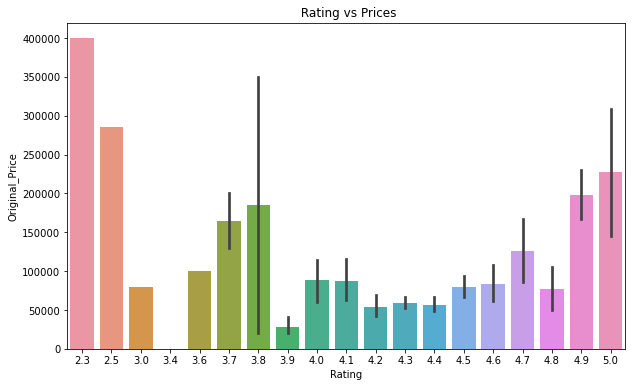

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x=tv['Rating'],y=tv['Original_Price'])
plt.title(" Rating vs Prices")

In [81]:
#we can conclude from here that products with higher prices have higher ratings to some extent

## plotting a boxplot for price

Text(0.5, 1.0, 'Boxplot')

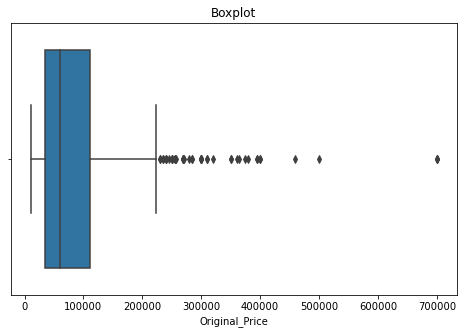

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(x=tv['Original_Price'])
plt.title("Boxplot")

In [83]:
#we conclude that theabove visualization,my analysis is that product available within  4.1,4.5,4.7 ratings with  the price constraint 30,000 to 70,000   

In [84]:
Here my aim is, by using Web scraping with Python 
to find out the best tv by considering key factors 
like the budget amount of Rs25,000–70,000 
and user product rating. 
Above are the products which customers can consider.

SyntaxError: invalid syntax (1026497270.py, line 1)

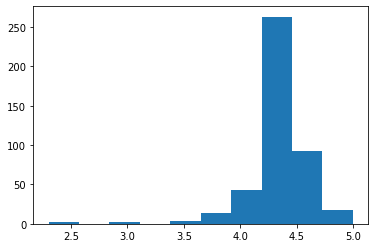

In [85]:
#hist plot for rating varies
plt.hist(tv['Rating'])
plt.show()

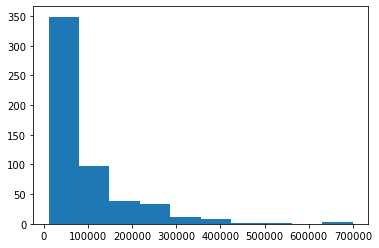

In [86]:
# histogram based on price
plt.hist(tv['Original_Price'])
plt.show()

<AxesSubplot:xlabel='Original_Price', ylabel='Density'>

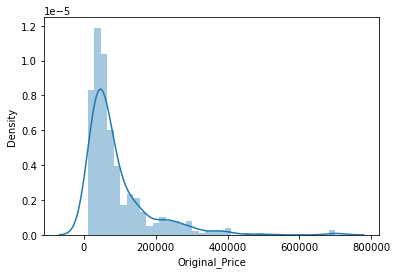

In [87]:
sns.distplot(tv['Original_Price'])

<AxesSubplot:xlabel='Rating'>

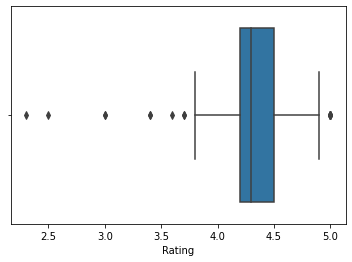

In [88]:
sns.boxplot(tv['Rating'])

<AxesSubplot:xlabel='Discount_Price'>

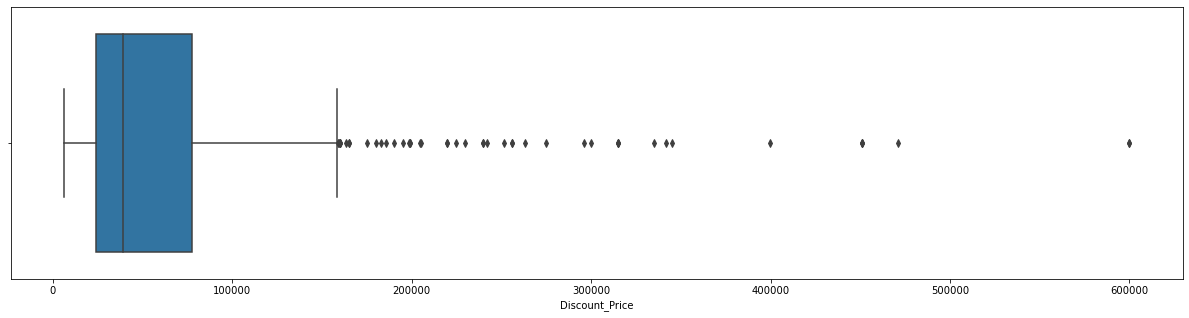

In [89]:
plt.figure(figsize=(21,5))
sns.boxplot(tv['Discount_Price'])

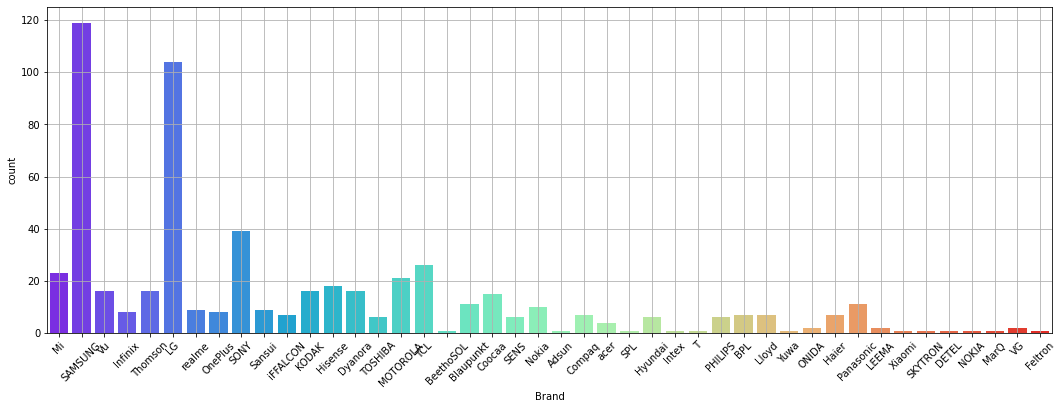

In [90]:
plt.figure(figsize=(18,6))
sns.countplot(x=tv["Brand"],palette="rainbow")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='Rating', ylabel='Original_Price'>

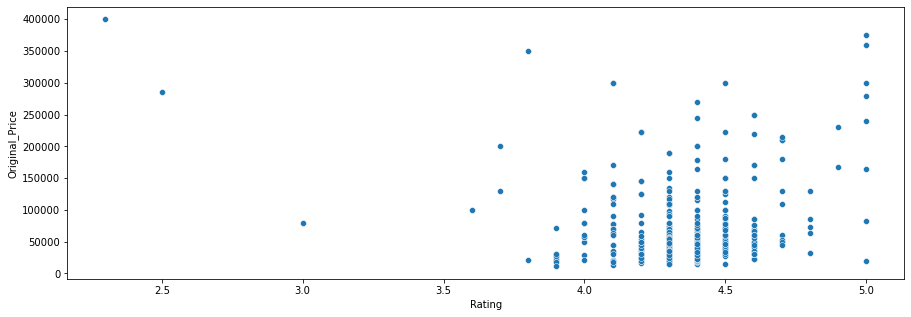

In [91]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Rating',y='Original_Price',data=tv)

<AxesSubplot:xlabel='Brand', ylabel='Original_Price'>

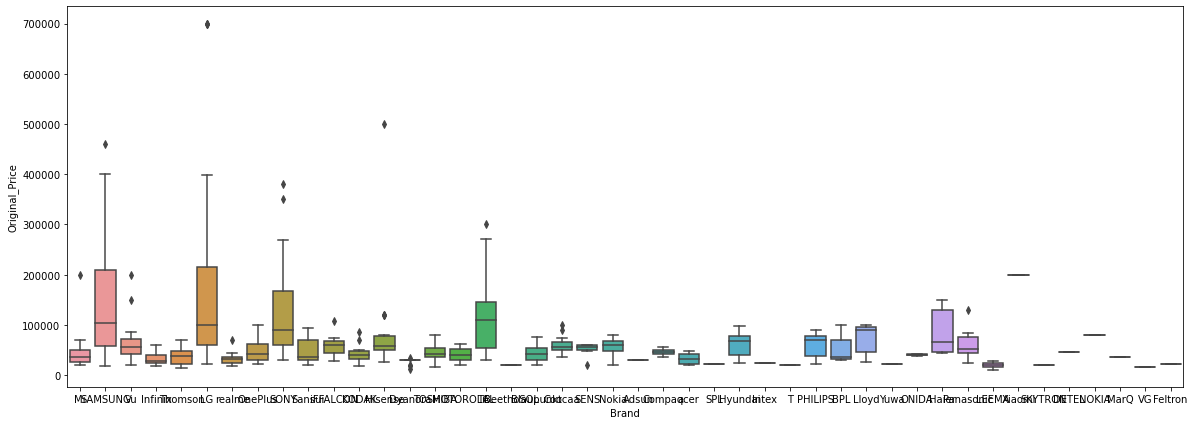

In [92]:
plt.figure(figsize=(20,7))
sns.boxplot(x=tv.Brand,y=tv.Original_Price)

<AxesSubplot:xlabel='Rating', ylabel='Brand'>

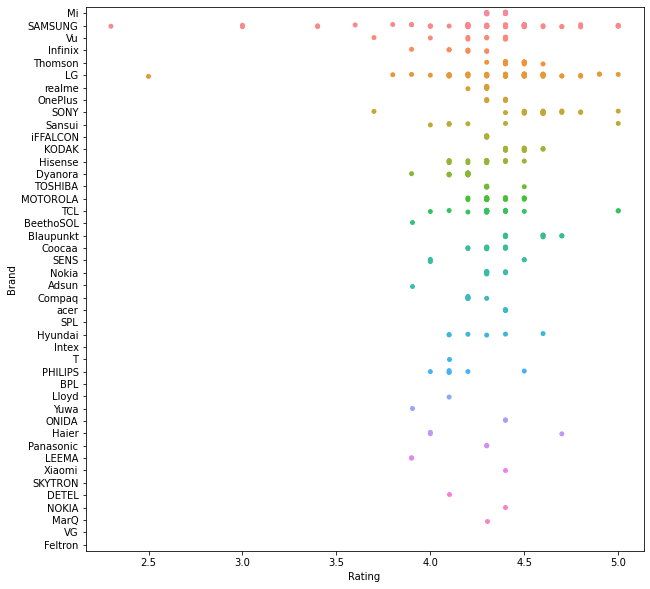

In [93]:
plt.figure(figsize=(10,10))
sns.stripplot(x='Rating',y='Brand',data=tv)

# multivariate analysis

<AxesSubplot:xlabel='Original_Price', ylabel='Rating'>

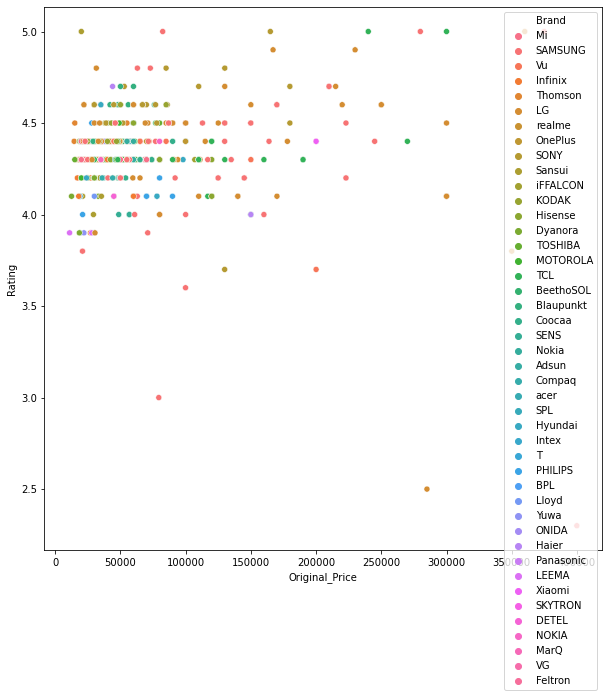

In [94]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Original_Price',y='Rating',data=tv,hue='Brand')

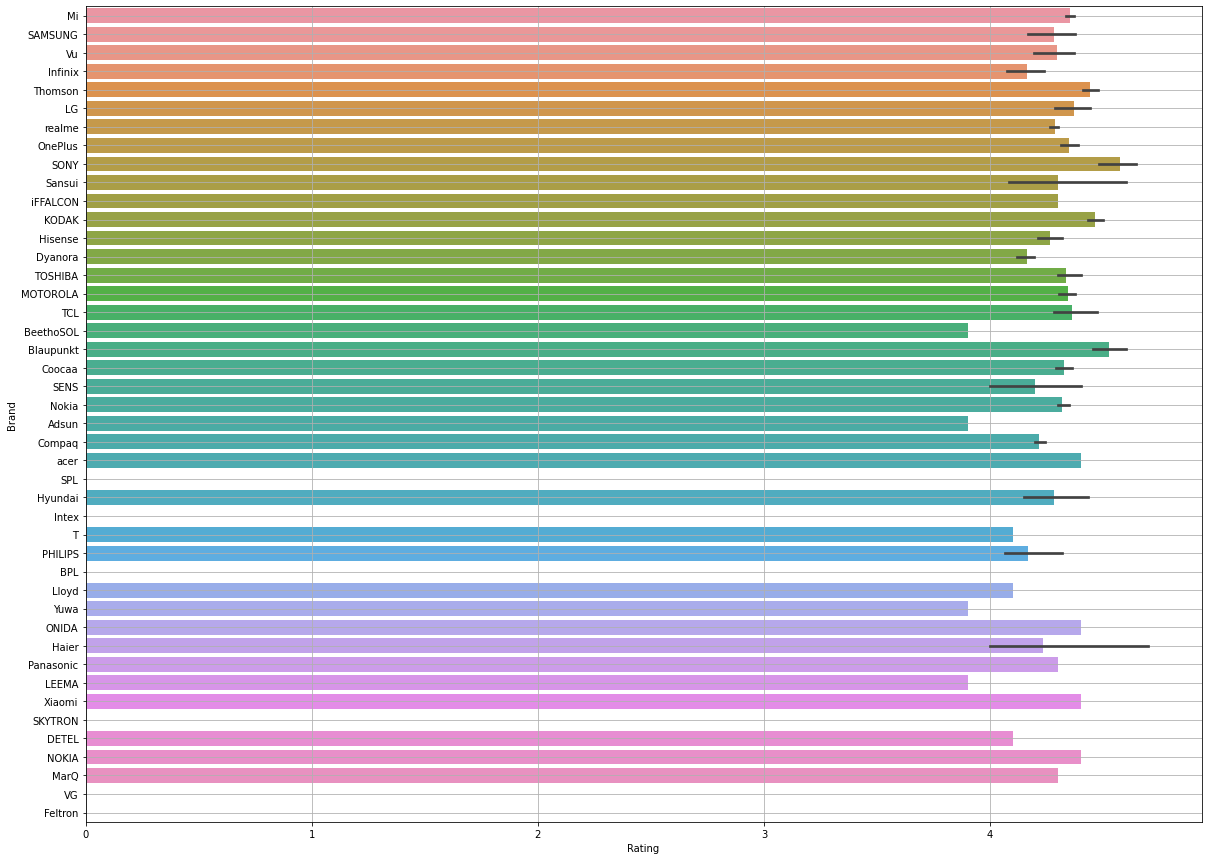

In [95]:
#Visualize the Rating vs Price
plt.figure(figsize=(20,15))
sns.barplot(x=tv["Rating"],y=tv["Brand"])
plt.grid()
plt.show()

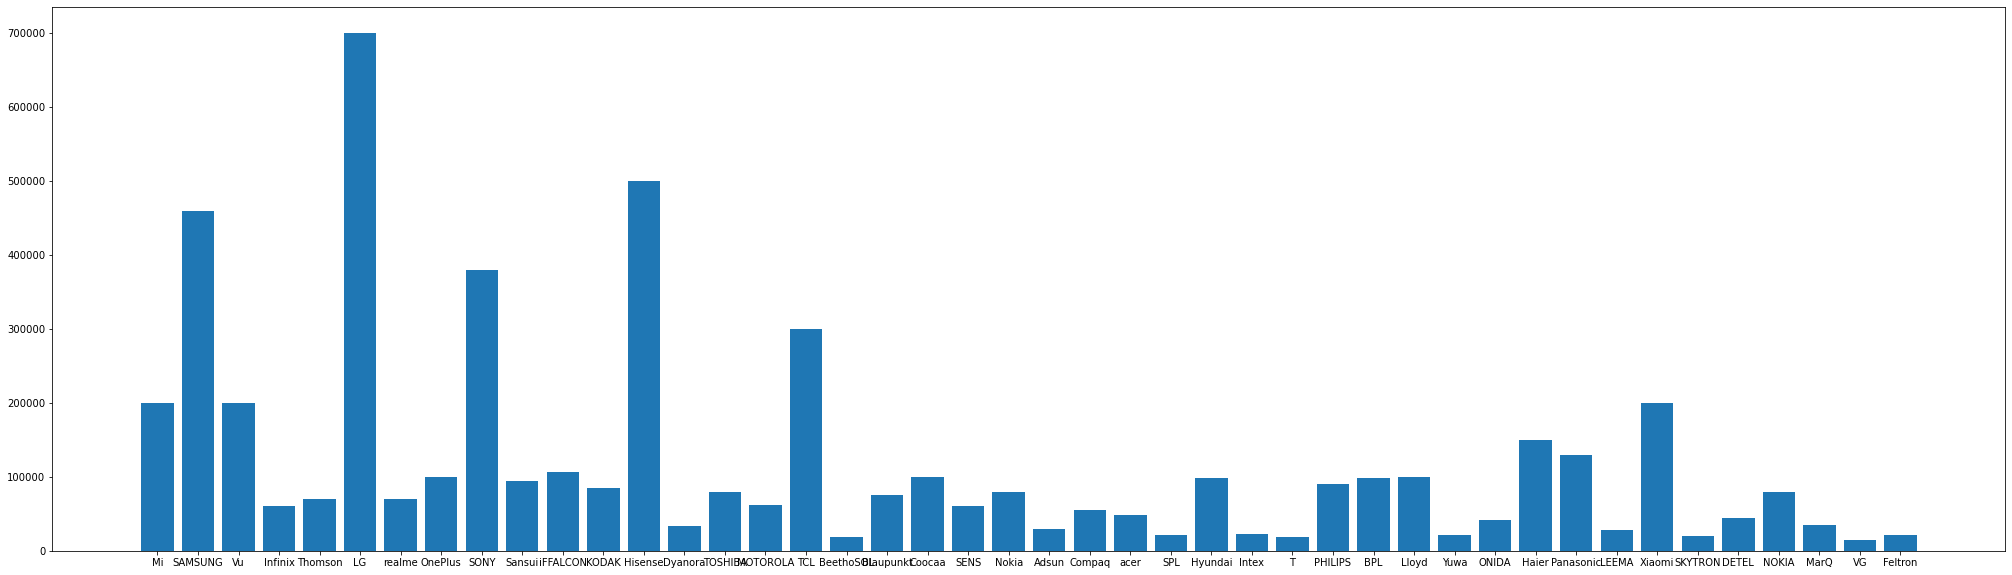

In [96]:
plt.figure(figsize=(35,10))
xvalues=tv['Brand']
yvalues=tv['Original_Price']
plt.bar(xvalues,yvalues)
plt.show()

* When comparing several quantities and when changing one variable, we might want a bar chart where we have bars of one color for one quantity value.
* A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

* A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

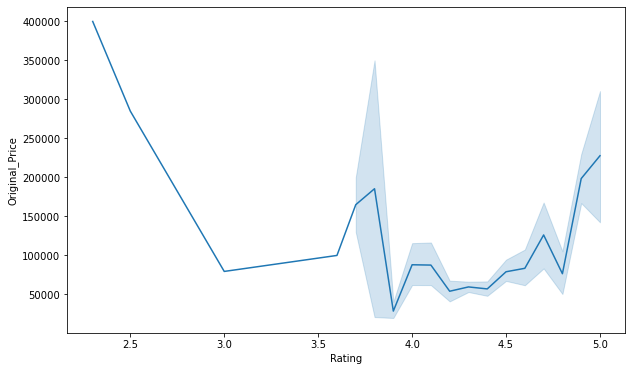

In [97]:
#Visualize the rating vs price
plt.figure(figsize=(10,6))
sns.lineplot(x='Rating',y='Original_Price',data=tv)
plt.show()

<AxesSubplot:xlabel='Original_Price', ylabel='OperatingSystem'>

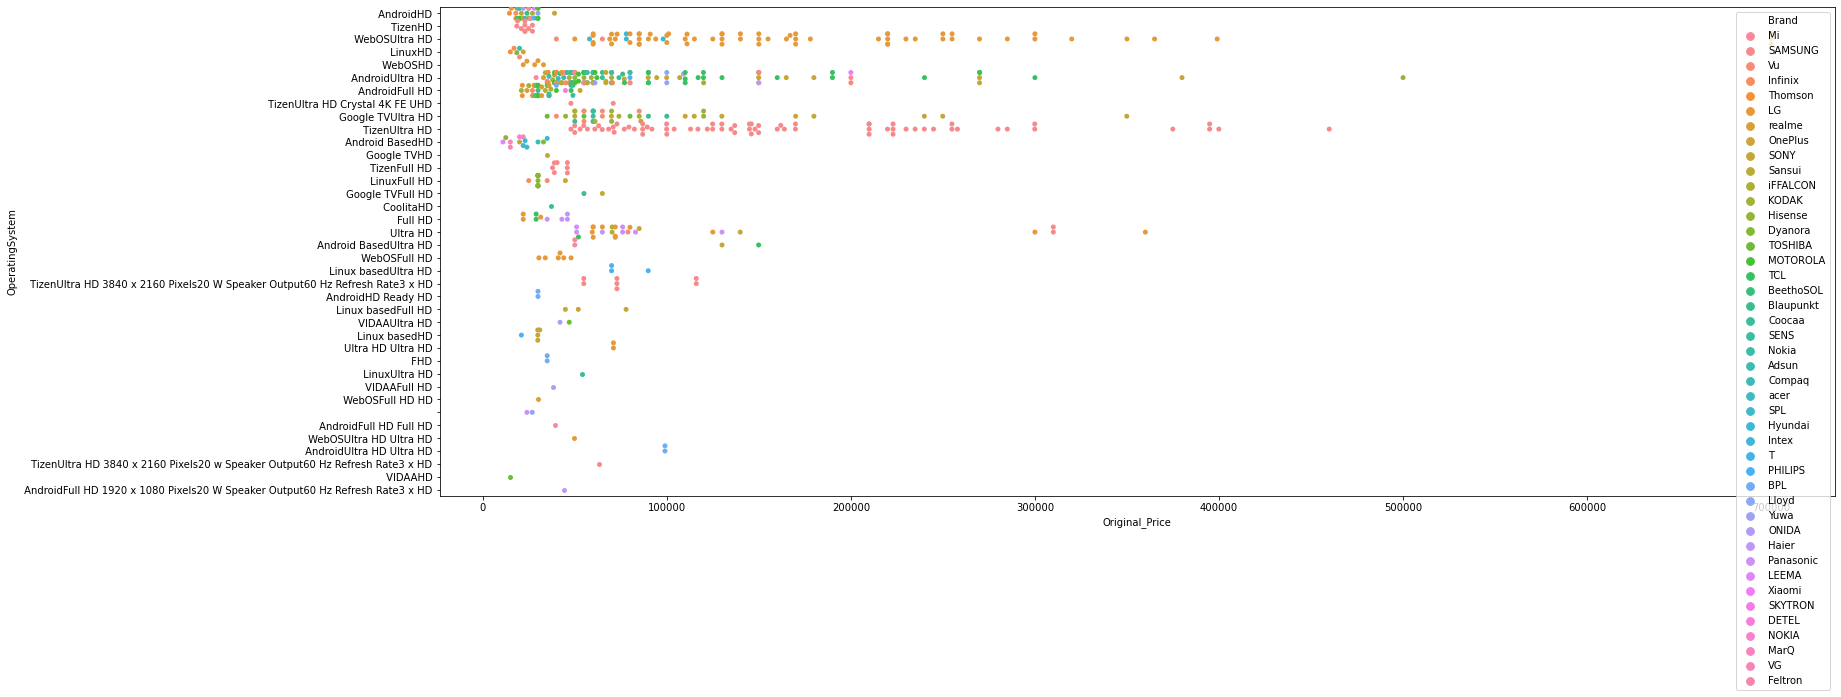

In [98]:
plt.figure(figsize=(25,9))
sns.swarmplot(x='Original_Price',y='OperatingSystem',data=tv,hue='Brand')

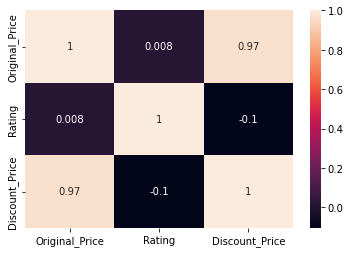

In [101]:
#Heat map :depicts values for a main variable of interest across two axis variables as a grid of colored squares.
#As we can see in the heat map, the features that are highly correlated are shown in lighter colors, 
#and those which are negatively correlated are shown in dark colors.
sns.heatmap(tv.corr(), annot=True)
plt.show()
#annot-to represent the cell values with text

<Figure size 1440x360 with 0 Axes>

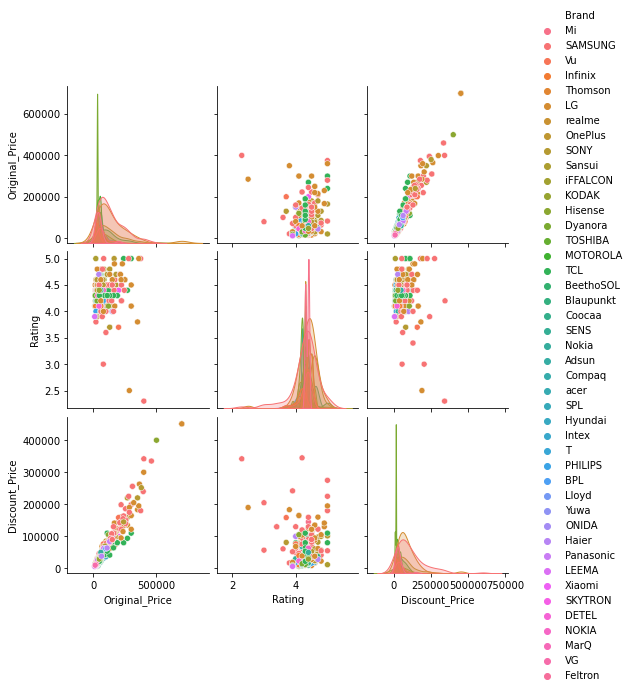

In [102]:
#pair plot
plt.figure(figsize=(20,5))
sns.pairplot(data=tv,hue='Brand')
plt.show()